In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [5]:
data = sklearn.datasets.fetch_california_housing()

In [6]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [8]:
data.target_names

['MedHouseVal']

In [9]:
df = pd.DataFrame(data.data, columns= data.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [14]:
df['MedHouseVal'] = data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [15]:
df.shape

(20640, 9)

In [16]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [17]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

<Axes: >

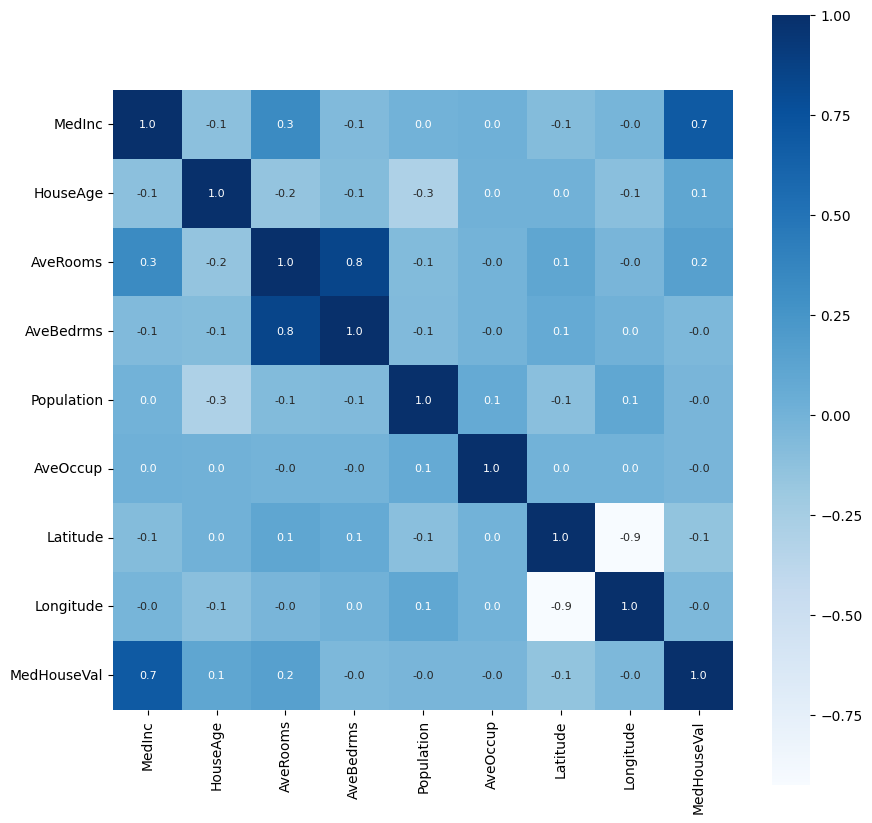

In [18]:
# constructing a heatmap to understand the correlation between columns....which columsn are directly realted to price.
correlation = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [19]:
X = df.drop('MedHouseVal', axis=1)
Y = df['MedHouseVal']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [40]:
X_train.shape

(16512, 8)

In [26]:
#model training

model = XGBRegressor()
model.fit(X_train, y_train)
#model.score(X_test, y_test)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [27]:
prediction = model.predict(X_train)

R sqaured error:

It provides a measure of how well the model fits the data.

It ranges between 0 and 1, where:

1 indicates that the model perfectly explains the variance.

0 indicates that the model does not explain any variance in the target variable.

***Mean Absolute Error (MAE) is a common metric for evaluating regression models. It calculates the average of the absolute differences between the actual and predicted values.


R-squared (R²): Values closer to 1 indicate a better fit. For example, if you get 0.85, it means that 85% of the variance in the target variable is explained by the model.

Mean Absolute Error (MAE): Lower values indicate better performance. If your MAE is 10, it means the average error between the actual and predicted values is 10 units of the target variable.



In [29]:
# R squared error
score_1 = metrics.r2_score(y_train, prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_train, prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.943650140819218
Mean Absolute Error :  0.1933648700612105


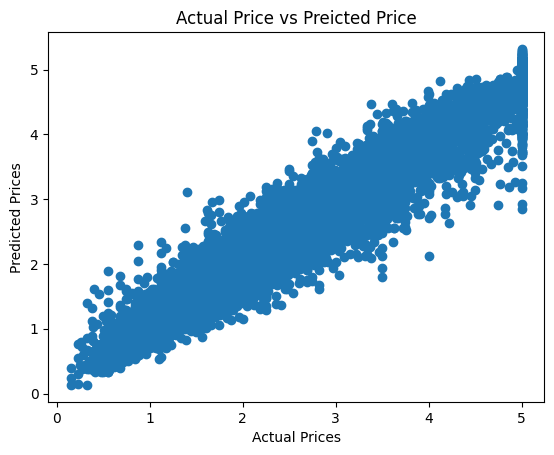

In [30]:
#actual vs predicted prices
plt.scatter(y_train, prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

In [32]:
test_prediction = model.predict(X_test)

In [34]:
metrics.r2_score(y_test, test_prediction)

0.8338000331788725

In [38]:
print(metrics.mean_absolute_error(y_test, test_prediction))

0.3108631800268186


In [47]:
#predictior

#input = (8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22)
input = (8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23)
input_array = np.asarray(input)
input_data_reshaped = input_array.reshape(1, -1)


predictor = model.predict(input_data_reshaped)
print(predictor)


[4.3000865]
